# Import libraries

In [47]:
import requests
import re
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Input the details

In [3]:
REALTOR_IDS = {
    # Page 1
    "ImmoBerlin Team": {
        "realtor_encrypted_id": "a6113ff5cfbcbf91be0",
        "realtor_cw_id": "001.174522",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/immoberlin-carsten-d-topel/das-team-von-immoberlin-de?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },
    
    "Britta Gruttmann": {
        "realtor_encrypted_id": "a4ac19a89ddd2c0cbddc817",
        "realtor_cw_id": "001.15417560",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/gruttmann-immobilien-gmbh/britta-c-gruttmann?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    "David Borck": {
        "realtor_encrypted_id": "acd3861b7a937e2c264",
        "realtor_cw_id": "001.362872",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/david-borck-immobiliengesellschaft-mbh/david-borck?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    "Engel Und Voelkers": {
        "realtor_encrypted_id": "afe287ec9ee74ff3136c1",
        "realtor_cw_id": "001.1011756",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/engel-und-voelkers-berlin-mitte-gmbh/engel-und-voelkers-berlin-brandenburg?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    "Anne Kleist": {
        "realtor_encrypted_id": "a4588d8fefee0b6fc81a237",
        "realtor_cw_id": "002.01011396671",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/coming-home-sales-gmbh-i-g/anne-kleist?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    "Christian Werner": {
        "realtor_encrypted_id": "a2550c84a5223f674",
        "realtor_cw_id": "001.68847",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/mpw-immobilien-michael-werner-gmbh/christian-werner?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    "Christian Vohl": {
        "realtor_encrypted_id": "aa1be4fc3a766ad512a77f3",
        "realtor_cw_id": "002.01002949789",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/accord-estates-gmbh/christian-vohl?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    "Escon GmbH": {
        "realtor_encrypted_id": "a189000f658d5f5f740f49b",
        "realtor_cw_id": "001.14779320",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/escon-gmbh/escon-gmbh?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    "Ohne Makler.Net": {
        "realtor_encrypted_id": "a80a48191914b2f9758b8",
        "realtor_cw_id": "001.5394580",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/inseriert-auf-ohne-makler-net/ohne-makler-net-privat-vom-eigentuemer?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    "Maximilian Verowski": {
        "realtor_encrypted_id": "a7128c87649ce9b6b920474",
        "realtor_cw_id": "009.b91b88e3-9ba2-49d7-bfd5-e0e1ba0ca04e",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/biddex-immobiliengesellschaft-mbh/maximilian-verowski?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    "Leonard Stein": {
        "realtor_encrypted_id": "a57ddf543dde8529d29f45d",
        "realtor_cw_id": "002.01007994385",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/immodo-berlin/leonard-stein?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    "Philipp Rahns": {
        "realtor_encrypted_id": "a5bfc621693bc6e587075bf",
        "realtor_cw_id": "002.01009738692",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/cavi-real-estate-gmbh/philipp-rahns?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    # Page 2
    "Gerd Kuehle": {
        "realtor_encrypted_id": "a6d6f9ff6d53709042d",
        "realtor_cw_id": "001.216206",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/gerd-kuehle-immobilien-gmbh/gerd-kuehle?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    "Arnaud Schott": {
        "realtor_encrypted_id": "a6d94181f93f060522c0a",
        "realtor_cw_id": "001.8874474",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/aden-immobilien/arnaud-schott?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    "Analisa Fornari": {
        "realtor_encrypted_id": "a8182ee2f26b34f8c8aa9c9",
        "realtor_cw_id": "001.15559477",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/m2square-annalisa-fornari/annalisa-fornari?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    "Mounir Ghazi": {
        "realtor_encrypted_id": "a7f9b33ed89ff746237c151",
        "realtor_cw_id": "002.01008673168",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/immobilienchirurg-gmbh/mounir-ghazi?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    "Stonehedge Real Estate": {
        "realtor_encrypted_id": "a98062d1666f10e645fe4b0",
        "realtor_cw_id": "001.15297510",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/stonehedge-real-estate-gmbh/stonehedge-real-estate?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    "Nurlan Bekmagambetov": {
        "realtor_encrypted_id": "a6b4f4f4759129ebf9e1a06",
        "realtor_cw_id": "009.eb808053-c275-4395-8fce-dc755606f8bd",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/sweet-home-real-estate-investments-gmbh/nurlan-bekmagambetov?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    "ICB GmbH Immobilien Consulting": {
        "realtor_encrypted_id": "aa4380af1916dfa287a",
        "realtor_cw_id": "001.858659",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/icb-gmbh-10629-berlin/icb-gmbh-immobilien-consulting-berlin?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    "Vanessa Baden": {
        "realtor_encrypted_id": "af09db960bf2889b5361cff",
        "realtor_cw_id": "002.01007866969",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/bsk-immobilien-gmbh/vanessa-baden?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    "Von Poll Immobilien Shop Pankow": {
        "realtor_encrypted_id": "a83ac9e793fd0069f98dedf",
        "realtor_cw_id": "002.01000748941",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/von-poll-immobilien-berlin-pankow-ulf-sobeck/von-poll-immobilien-shop-berlin-pankow?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },
    
    "Von Poll Immobilien Shop Treptow": {
        "realtor_encrypted_id": "a247585bf74c4d77a2f7d6c",
        "realtor_cw_id": "002.01000792787",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/von-poll-immobilien-berlin-treptow-koepenick-immobilientraeume-berlin-sued-ost-gmbh/von-poll-immobilien-shop-berlin-treptow-koepenick?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    "Next Estate GmbH": {
        "realtor_encrypted_id": "a8105456878f37b755e79",
        "realtor_cw_id": "001.5925570",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/next-estate-gmbh/next-estate-gmbh?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    },

    "Kensington": {
        "realtor_encrypted_id": "af878ed89d06ec114197800",
        "realtor_cw_id": "002.01009718989",
        "realtor_url": "https://www.immobilienscout24.de/anbieter/profil/kensington-finest-properties-international-berlin-pankow-oberhavel-barnim/kensington-berlin?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult"
    }
}

PROPERTY_TYPES = ["BUY", "RENT"]

GSHEET_KEY = "1sWfCkRAfvZDXV3e0bQfQNucU5mxE9DEAuAq8EIioZ2k"

In [4]:
def get_makler_listings(realtor_encrypted_id: str, realtor_cw_id: str, property_type: str, **kwargs) -> dict:
    """
    A function to get the listings of a realtor
    """
    # Print a status message
    print(f"Getting listings for {kwargs['realtor_name']} with property type {property_type}")

    # Define the request URL
    url = "https://pro-sov-agent-api.is24-realtor-directory.s24cloud.net/searchlistings?realtorEncryptedId={realtor_encrypted_id}&realtorCwid={realtor_cw_id}&pageNumber=1&pageSize=1000&type={property_type}&realEstateType=RESIDENTIAL"

    # Define the request headers and payload
    payload = {}
    headers = {}

    # Send the request
    response = requests.request("GET", url.format(realtor_encrypted_id=realtor_encrypted_id, realtor_cw_id=realtor_cw_id, property_type=property_type), headers=headers, data=payload)

    # Extract the JSON response
    response_json = response.json()

    # Parse the response
    if response.status_code == 200 and response_json["data"] != []:
        # Create output_dict
        output_list = []
        for res in response_json["data"]:
            output_dict = {
                "realtor_name": kwargs["realtor_name"],
                "realtor_url": kwargs["realtor_url"],
                "realtor_encrypted_id": realtor_encrypted_id,
                "realtor_cw_id": realtor_cw_id,
                "property_type": property_type,
                "expose_id": res["exposeId"],
                "expose_url": f"https://www.immobilienscout24.de/expose/{res['exposeId']}#/",
                "type": res["type"],
                "region": res["region"] if res["region"] != "" else None,
                "city": res["city"],
                "zip_code": res["postcode"],
                "living_space": res["livingSpace"].split(" ")[0],
                "price": res["price"],
                "picture_url": res["pictureUrl"],
                "is_reference": res["isReference"],
                "is_buy": res["isBuy"],
                "number_of_rooms": res["numberOfRooms"],
            }

            output_list.append(output_dict)
    else:
        output_list = [{
            "realtor_name": kwargs["realtor_name"],
            "realtor_url": kwargs["realtor_url"],
            "realtor_encrypted_id": realtor_encrypted_id,
            "realtor_cw_id": realtor_cw_id,
            "property_type": property_type,
            "expose_id": None,
            "expose_url": None,
            "type": None,
            "region": None,
            "city": None,
            "zip_code": None,
            "living_space": None,
            "price": None,
            "picture_url": None,
            "is_reference": None,
            "is_buy": None,
            "number_of_rooms": None,
        }]
    
    # Change output_list to a data frame
    df_output = pd.DataFrame(output_list)

    # Remove records with None values
    df_output = df_output[df_output["price"].notna()]

    print("\n")

    return df_output

In [5]:
df_final_output_before_contact = []
for prop_type in PROPERTY_TYPES:
    for k, v in REALTOR_IDS.items():
        df_iter = get_makler_listings(
            realtor_encrypted_id=v["realtor_encrypted_id"],
            realtor_cw_id=v["realtor_cw_id"],
            property_type=prop_type,
            
            # kwargs
            realtor_name=k,
            realtor_url=v["realtor_url"],
        )
        df_final_output_before_contact.append(df_iter)

Getting listings for ImmoBerlin Team with property type BUY


Getting listings for Britta Gruttmann with property type BUY


Getting listings for David Borck with property type BUY


Getting listings for Engel Und Voelkers with property type BUY


Getting listings for Anne Kleist with property type BUY


Getting listings for Christian Werner with property type BUY


Getting listings for Christian Vohl with property type BUY


Getting listings for Escon GmbH with property type BUY


Getting listings for Ohne Makler.Net with property type BUY


Getting listings for Maximilian Verowski with property type BUY


Getting listings for Leonard Stein with property type BUY


Getting listings for Philipp Rahns with property type BUY


Getting listings for Gerd Kuehle with property type BUY


Getting listings for Arnaud Schott with property type BUY


Getting listings for Analisa Fornari with property type BUY


Getting listings for Mounir Ghazi with property type BUY


Getting listings for Stone

In [6]:
df_final_output = pd.concat(df_final_output_before_contact)
df_final_output

/var/folders/2m/zbcmnq4n1891yvkfydvyjy_h0000gn/T/ipykernel_7585/2017900083.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_final_output = pd.concat(df_final_output_before_contact)


,realtor_name,realtor_url,realtor_encrypted_id,realtor_cw_id,property_type,expose_id,expose_url,type,region,city,zip_code,living_space,price,picture_url,is_reference,is_buy,number_of_rooms
0,ImmoBerlin Team,https://www.immobilienscout24.de/anbieter/prof...,a6113ff5cfbcbf91be0,001.174522,BUY,157536830,https://www.immobilienscout24.de/expose/157536...,Wohnung,None,Oranienburg,16515,83,340000.0,https://pictures.immobilienscout24.de/listings...,False,True,3.0
1,ImmoBerlin Team,https://www.immobilienscout24.de/anbieter/prof...,a6113ff5cfbcbf91be0,001.174522,BUY,157530545,https://www.immobilienscout24.de/expose/157530...,Wohnung,None,Berlin,14052,155,975000.0,https://pictures.immobilienscout24.de/listings...,False,True,4.0
2,ImmoBerlin Team,https://www.immobilienscout24.de/anbieter/prof...,a6113ff5cfbcbf91be0,001.174522,BUY,157523270,https://www.immobilienscout24.de/expose/157523...,Wohnung,None,Berlin,10585,59,499000.0,https://pictures.immobilienscout24.de/listings...,False,True,2.0
3,ImmoBerlin Team,https://www.immobilienscout24.de/anbieter/prof...,a6113ff5cfbcbf91be0,001.174522,BUY,157518066,https://www.immobilienscout24.de/expose/157518...,Wohnung,None,Potsdam,14469,110,719000.0,https://pictures.immobilienscout24.de/listings...,False,True,3.0
4,ImmoBerlin Team,https://www.immobilienscout24.de/anbieter/prof...,a6113ff5cfbcbf91be0,001.174522,BUY,157516756,https://www.immobilienscout24.de/expose/157516...,Wohnung,None,Berlin,10247,62,439000.0,https://pictures.immobilienscout24.de/listings...,False,True,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Nurlan Bekmagambetov,https://www.immobilienscout24.de/anbieter/prof...,a6b4f4f4759129ebf9e1a06,009.eb808053-c275-4395-8fce-dc755606f8bd,RENT,157027346,https://www.immobilienscout24.de/expose/157027...,Wohnung,Berlin,Berlin,13507,74,1290.0,https://pictures.immobilienscout24.de/listings...,False,False,2.0
5,Nurlan Bekmagambetov,https://www.immobilienscout24.de/anbieter/prof...,a6b4f4f4759129ebf9e1a06,009.eb808053-c275-4395-8fce-dc755606f8bd,RENT,156484908,https://www.immobilienscout24.de/expose/156484...,Wohnung,None,Berlin,10553,42,737.0,https://pictures.immobilienscout24.de/listings...,False,False,1.0
0,Von Poll Immobilien Shop Pankow,https://www.immobilienscout24.de/anbieter/prof...,a83ac9e793fd0069f98dedf,002.01000748941,RENT,157114816,https://www.immobilienscout24.de/expose/157114...,Wohnung,None,Berlin / Pankow,13156,190,3600.0,https://pictures.immobilienscout24.de/listings...,False,False,4.0
0,Von Poll Immobilien Shop Treptow,https://www.immobilienscout24.de/anbieter/prof...,a247585bf74c4d77a2f7d6c,002.01000792787,RENT,157316351,https://www.immobilienscout24.de/expose/157316...,Wohnung,None,Berlin / Wendenschloss,12557,56,1100.0,https://pictures.immobilienscout24.de/listings...,False,False,2.0


In [7]:
df_final_output = df_final_output.reset_index(drop=True)
df_final_output

,realtor_name,realtor_url,realtor_encrypted_id,realtor_cw_id,property_type,expose_id,expose_url,type,region,city,zip_code,living_space,price,picture_url,is_reference,is_buy,number_of_rooms
0,ImmoBerlin Team,https://www.immobilienscout24.de/anbieter/prof...,a6113ff5cfbcbf91be0,001.174522,BUY,157536830,https://www.immobilienscout24.de/expose/157536...,Wohnung,None,Oranienburg,16515,83,340000.0,https://pictures.immobilienscout24.de/listings...,False,True,3.0
1,ImmoBerlin Team,https://www.immobilienscout24.de/anbieter/prof...,a6113ff5cfbcbf91be0,001.174522,BUY,157530545,https://www.immobilienscout24.de/expose/157530...,Wohnung,None,Berlin,14052,155,975000.0,https://pictures.immobilienscout24.de/listings...,False,True,4.0
2,ImmoBerlin Team,https://www.immobilienscout24.de/anbieter/prof...,a6113ff5cfbcbf91be0,001.174522,BUY,157523270,https://www.immobilienscout24.de/expose/157523...,Wohnung,None,Berlin,10585,59,499000.0,https://pictures.immobilienscout24.de/listings...,False,True,2.0
3,ImmoBerlin Team,https://www.immobilienscout24.de/anbieter/prof...,a6113ff5cfbcbf91be0,001.174522,BUY,157518066,https://www.immobilienscout24.de/expose/157518...,Wohnung,None,Potsdam,14469,110,719000.0,https://pictures.immobilienscout24.de/listings...,False,True,3.0
4,ImmoBerlin Team,https://www.immobilienscout24.de/anbieter/prof...,a6113ff5cfbcbf91be0,001.174522,BUY,157516756,https://www.immobilienscout24.de/expose/157516...,Wohnung,None,Berlin,10247,62,439000.0,https://pictures.immobilienscout24.de/listings...,False,True,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4369,Nurlan Bekmagambetov,https://www.immobilienscout24.de/anbieter/prof...,a6b4f4f4759129ebf9e1a06,009.eb808053-c275-4395-8fce-dc755606f8bd,RENT,157027346,https://www.immobilienscout24.de/expose/157027...,Wohnung,Berlin,Berlin,13507,74,1290.0,https://pictures.immobilienscout24.de/listings...,False,False,2.0
4370,Nurlan Bekmagambetov,https://www.immobilienscout24.de/anbieter/prof...,a6b4f4f4759129ebf9e1a06,009.eb808053-c275-4395-8fce-dc755606f8bd,RENT,156484908,https://www.immobilienscout24.de/expose/156484...,Wohnung,None,Berlin,10553,42,737.0,https://pictures.immobilienscout24.de/listings...,False,False,1.0
4371,Von Poll Immobilien Shop Pankow,https://www.immobilienscout24.de/anbieter/prof...,a83ac9e793fd0069f98dedf,002.01000748941,RENT,157114816,https://www.immobilienscout24.de/expose/157114...,Wohnung,None,Berlin / Pankow,13156,190,3600.0,https://pictures.immobilienscout24.de/listings...,False,False,4.0
4372,Von Poll Immobilien Shop Treptow,https://www.immobilienscout24.de/anbieter/prof...,a247585bf74c4d77a2f7d6c,002.01000792787,RENT,157316351,https://www.immobilienscout24.de/expose/157316...,Wohnung,None,Berlin / Wendenschloss,12557,56,1100.0,https://pictures.immobilienscout24.de/listings...,False,False,2.0


In [8]:
# Export the results to a CSV
df_final_output.to_csv("makler_listings_immoscout.csv", index=False)

In [38]:
# Change living space to float
df_final_output["living_space"] = df_final_output["living_space"].astype(float)

# Filter df_final_output to only include the characteristics we need
df_desired_characteristics = df_final_output[
    (df_final_output["number_of_rooms"] >= 2) &
    (df_final_output["living_space"] >= 50)
].copy()

# Analysis

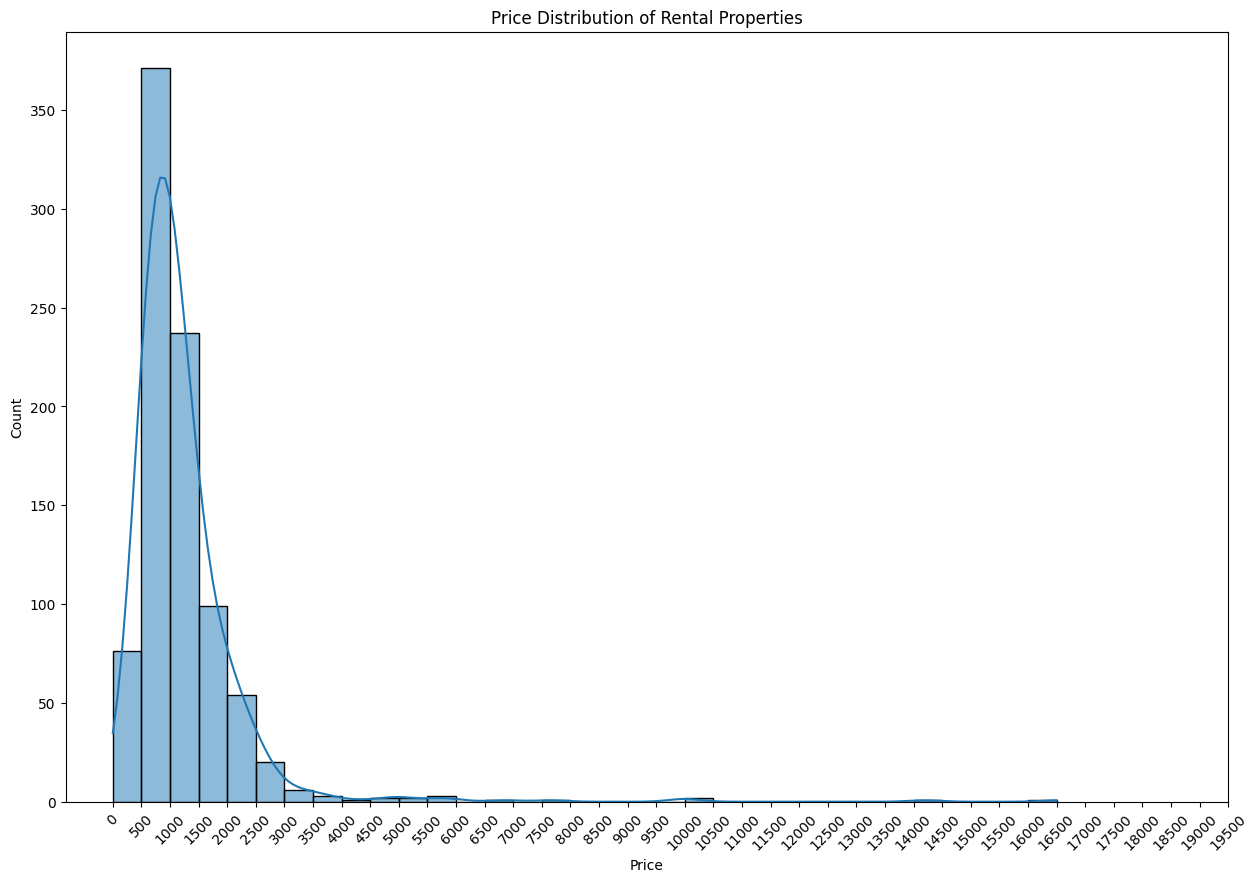

In [39]:
# Plot the price of rental properties
plt.figure(figsize=(15, 10))
df_plot_rent = df_desired_characteristics[df_desired_characteristics["property_type"] == "RENT"].copy()
sns.histplot(df_plot_rent["price"], binwidth=500, kde=True)
plt.xticks(range(0, 20000, 500), rotation=45)
plt.title("Price Distribution of Rental Properties")
plt.xlabel("Price")
plt.show()

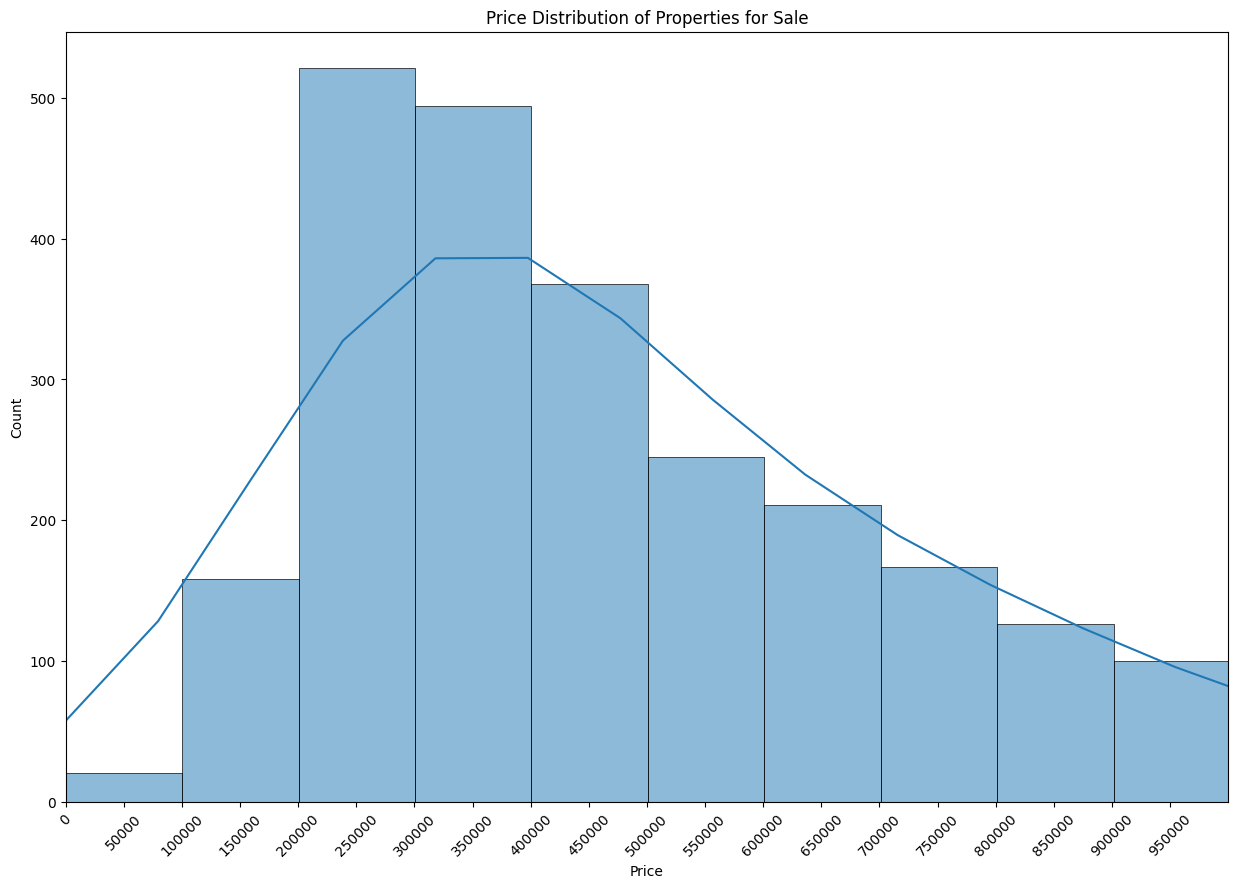

In [40]:
# Plot the price of properties for sale
plt.figure(figsize=(15, 10))
df_plot_buy = df_desired_characteristics[df_desired_characteristics["property_type"] == "BUY"].copy()
sns.histplot(df_plot_buy["price"], binwidth=100000, kde=True)
plt.xticks(range(0, 1000000, 50000), rotation=45)
plt.xlim(0, 1000000)
plt.title("Price Distribution of Properties for Sale")
plt.xlabel("Price")
plt.show()

In [48]:
# Rental properties with less than 1k rental price
df_desired_characteristics[(df_desired_characteristics["price"] <= 1300) & (df_desired_characteristics["property_type"] == "RENT") & (df_desired_characteristics["city"] == "Berlin")]

,realtor_name,realtor_url,realtor_encrypted_id,realtor_cw_id,property_type,expose_id,expose_url,type,region,city,zip_code,living_space,price,picture_url,is_reference,is_buy,number_of_rooms
3264,ImmoBerlin Team,https://www.immobilienscout24.de/anbieter/profil/immoberlin-carsten-d-topel/das-team-von-immoberlin-de?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult,a6113ff5cfbcbf91be0,001.174522,RENT,157196077,https://www.immobilienscout24.de/expose/157196077#/,Wohnung,None,Berlin,13156,66.0,1300.00,https://pictures.immobilienscout24.de/listings/60400957-ef61-4233-ab36-589ba65a582d-1878948911.jpg,False,False,2.0
3265,ImmoBerlin Team,https://www.immobilienscout24.de/anbieter/profil/immoberlin-carsten-d-topel/das-team-von-immoberlin-de?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult,a6113ff5cfbcbf91be0,001.174522,RENT,157324188,https://www.immobilienscout24.de/expose/157324188#/,Wohnung,None,Berlin,13156,66.0,1300.00,https://pictures.immobilienscout24.de/listings/c6128f70-235c-404d-b17f-955afad69d0a-1880613241.jpg,False,False,2.0
3291,Engel Und Voelkers,https://www.immobilienscout24.de/anbieter/profil/engel-und-voelkers-berlin-mitte-gmbh/engel-und-voelkers-berlin-brandenburg?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult,afe287ec9ee74ff3136c1,001.1011756,RENT,156783187,https://www.immobilienscout24.de/expose/156783187#/,Wohnung,Berlin,Berlin,13629,58.0,1137.00,https://pictures.immobilienscout24.de/listings/5d51469f-0e99-4cbd-874f-ff6094b9bca3-1874206523.jpg,False,False,2.0
3330,Escon GmbH,https://www.immobilienscout24.de/anbieter/profil/escon-gmbh/escon-gmbh?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult,a189000f658d5f5f740f49b,001.14779320,RENT,157383734,https://www.immobilienscout24.de/expose/157383734#/,Wohnung,None,Berlin,12489,66.0,916.58,https://pictures.immobilienscout24.de/listings/29369211-4ba2-4b76-aa8f-52e149cabf27-1881291315.jpg,False,False,2.0
3505,Ohne Makler.Net,https://www.immobilienscout24.de/anbieter/profil/inseriert-auf-ohne-makler-net/ohne-makler-net-privat-vom-eigentuemer?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult,a80a48191914b2f9758b8,001.5394580,RENT,157460345,https://www.immobilienscout24.de/expose/157460345#/,Wohnung,None,Berlin,12045,62.0,990.00,https://pictures.immobilienscout24.de/listings/518138c0-f03f-4bfb-8b26-8bebc0bba491-1883078304.jpg,False,False,2.0
3714,Ohne Makler.Net,https://www.immobilienscout24.de/anbieter/profil/inseriert-auf-ohne-makler-net/ohne-makler-net-privat-vom-eigentuemer?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult,a80a48191914b2f9758b8,001.5394580,RENT,157356863,https://www.immobilienscout24.de/expose/157356863#/,Wohnung,Berlin,Berlin,13088,68.0,920.00,https://pictures.immobilienscout24.de/listings/be611d91-e7dc-42d9-bc53-85f4ca39351b-1881671639.jpg,False,False,2.0
3728,Ohne Makler.Net,https://www.immobilienscout24.de/anbieter/profil/inseriert-auf-ohne-makler-net/ohne-makler-net-privat-vom-eigentuemer?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult,a80a48191914b2f9758b8,001.5394580,RENT,157351064,https://www.immobilienscout24.de/expose/157351064#/,Wohnung,Berlin,Berlin,10437,59.0,1180.00,https://pictures.immobilienscout24.de/listings/9711764b-46a0-4b95-8ffa-a209c58f528d-1880972851.jpg,False,False,2.0
3787,Ohne Makler.Net,https://www.immobilienscout24.de/anbieter/profil/inseriert-auf-ohne-makler-net/ohne-makler-net-privat-vom-eigentuemer?searchid=bervr101c12oi&geoIds=1276003001&referer=agent_searchresult,a80a48191914b2f9758b8,001.5394580,RENT,157327074,https://www.immobilienscout24.de/expose/157327074#/,Wohnung,None,Berlin,12524,60.0,1200.00,https://pictures.immobilienscout24.de/listings/dc39ec8e-6475-4d27-9843-501e1bae2697-1880644675.jpg,False,False,3.0
3834,Ohne Makler.Net,https://www.immobilienscout24.de/anbieter/profil/inseriert-auf-ohne-makler-net/ohne-makler-net-privat-vom-eigentuemer?searchid=bervr101c12oi&geoIds=1276003001&referer=